# Importing Libraries:

In [1]:
import numpy as np 

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
from summarytools import dfSummary

# Displaying data:

In [6]:
df = pd.read_csv('credit_risk.csv')

In [7]:
df.sample(5).T

,13827,13879,7795,2624,6422
Id,13827,13879,7795,2624,6422
Age,26,22,25,25,25
Income,117500,97000,38400,43200,40000
Home,RENT,MORTGAGE,RENT,RENT,RENT
Emp_length,0.0,0.0,0.0,3.0,2.0
Intent,VENTURE,EDUCATION,DEBTCONSOLIDATION,PERSONAL,MEDICAL
Amount,13800,7500,7000,3000,6000
Rate,7.49,11.34,9.99,13.8,10.65
Status,0,0,0,0,0
Percent_income,0.12,0.08,0.18,0.07,0.15


# Data Stats:

In [8]:
dfSummary(df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Id[int64],Mean (sd) : 16290.0 (9405.5)min < med < max:0.0 < 16290.0 < 32780.0IQR (CV) : 16290.0 (1.7),"32,581 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8qNh9FAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACCElEQVR4nO3YvY7aUBRF4X3Nj8yAbCE00NGkT+GSh8jD5iF4Aoo0qeiQkGWEZxDIcaqRpgnYmJBsaX21z723WEJHhLquBfzvon/9AKCJ/q0PQggjScM7z48k/bpztuu8692u75akc13X7x3m/+hqqCGE0Ww2+5YkybTtwVVVDcqy/DKZTH5GUXR55rzr3a7v/nA4HPIQwve/EeutX9RhkiTT1Wr1nqbpqc3B2+12utlsXrMs+7FYLPK2D+sy73q367slqSiKeL1eT/f7/VDS00OVJKVpeprP529tDs7zfCRJ4/G49WzXede7Xd/9yejOuZsahQo0UVXVQFISQrhn/Op+S6h4iLIsB5fL5etyuez1er1Wa6J0e78lVDzE+Xzux3H8kmXZqe2O22S/JVQ8VIcd9+p+yx/+sECosECosECosECosECosECosECosECosECosECosECosECosECosECosECosECosECosECosECosECosECosECosECosECosECosECosECosECosECosECosECosECosECosECosECosECosECosECosECosECosECosECosECosECosECosECosECosECosECosECosECosECosECosECosECosECosECosECosNBv8lFRFHHbg4/HYyxJZVnGu93u5Znzrne7vrvrfJO+fgM5GUzWCFt/OgAAAABJRU5ErkJggg=="">",0(0.0%)
2,Age[int64],Mean (sd) : 27.7 (6.3)min < med < max:20.0 < 26.0 < 144.0IQR (CV) : 7.0 (4.4),58 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8qNh9FAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACB0lEQVR4nO3ZsW7aUBSH8XMLoReobBCt2VjZOjDyEH3YPIRX3gPJIFs4dozQ7dalaontWMk/+X4z5+Dhky37uhCCAe/dl7e+AOAlxvd+4Jybmtmk4/4mhFB1nAX++G+ozrnparX6FUXRssvyoijOzrlHYkVf9+6okyiKlvv9vorjuG6zOM9zn6bpMsuyiZkRKnq5++g3M4vjuE6S5KnD/mmHGeAvvExBAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCwnjI5bfb7cHMIudc1xVNCKF6xUuCqMFCLcvy4Xq9/txsNqPRaFR32VEUxdk590isGCzUpmnG3vvZbrer1+v1ue18nuc+TdNllmUTMyPUT27QR7+Z2Xw+r5Mkeeo4Pn3Vi4EsXqYggVAhgVAhgVAhgVAhgVAhYfDPU330PNniVOsDebeh9j3Z4lTrY3lRqHme+7aLL5eLNzMry9Ifj8dZ2/nT6fTNez/bbrdusVg8t5mtqurr4XD4kWXZd+dc0fa/8SaeQwj/vCH9Biomf0WQscupAAAAAElFTkSuQmCC"">",0(0.0%)
3,Income[int64],Mean (sd) : 66074.8 (61983.1)min < med < max:4000.0 < 55000.0 < 6000000.0IQR (CV) : 40700.0 (1.1),"4,295 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8qNh9FAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABaUlEQVR4nO3XT2oCMRiH4aSI6GYGETyMh+hhewhvIyUuqi1Iuuum1D/jov3R59km+cjiZYbU3nuBv+7pty8At5hd21BrXZZS5hPnf/TejxPPwpeLodZal+v1+nkYhtWU4YfD4bXW+iJWHnXtizofhmG13W6P4zie7hncWlvsdrvVfr+fl1KEykOu/vpLKWUcx9Nms3mbMH854Qx84zFFBKESQahEECoRhEoEoRJBqEQQKhGESgShEkGoRBAqEYRKBKESQahEECoRhEoEoRJBqEQQKhGESgShEkGoRBAqEYRKBKESQahEECoRhEoEoRJBqEQQKhGESgShEkGoRBAqEYRKBKESQahEECoRhEoEoRJBqEQQKhGESgShEkGoRBAqEYRKBKESQahEECoRhEoEoRJBqEQQKhGESgShEkGoRBAqEYRKBKESQahEmN2yqbW2uHdwa21xPp9npZSh1nr3xfh33nvvp58WPwF79y3yrjldnwAAAABJRU5ErkJggg=="">",0(0.0%)
4,Home[object],1. RENT2. MORTGAGE3. OWN4. OTHER,"16,446 (50.5%)13,444 (41.3%)2,584 (7.9%)107 (0.3%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABcCAYAAAB5jMeAAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8qNh9FAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAB7klEQVR4nO3bQWqjcBjG4c8iZbpRgpDD5BA97BzC24QQF9PSjbOYzr4a8or4PCf4J/wwUXybeZ4LEl62PgDHITZimqp6q6rXrQ+yQ1/zPH9sfYg9aYdheO+67rT1QfZmmqZb0zS/Bfdzbdd1p8vl8tH3/efWh9mL+/3+axzH0/V6fa0qsf1QW1XV9/3n+Xz+s/VhduZt6wPsjRsEYsRGjNiIERsxYiNGbMSIjRixESM2YsRGjNiIERsxYiOmrfr3yszWB9kT39c67TRNt3EcT+WVmUWmabpV1dfW59gTr4Wv57XwhRpTPlLcIBDjZ9TPYczh11VWUjmHXldZSWVZV3nkE+MGgRixESM2YsRGjNiIERsxYiNGbMSIjRixESM2YsRGjNiIERsxh57yHfVzb+XwUz6TvBwbBBuEGFM+YtZc2VwJWGXxusoaibUWrauskXjEmnXVIe9aeZyHusSIjRixESM2YsRGjNiIERsxYiNGbMSIjRixESM2YsRGjNiIWbSuskbiEYvXVdZIrGWDQIx1FTH/r2zlasWztcMwvFdVWUzxbC9d152+p3xHXsUT4DkbMWIjRmzEiI0YsREjNmLERozYiBEbMWIjRmzEiI0YsREjNmLERozYiGm/11JVFlM8m

# EDA: 

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              32581 non-null  int64  
 1   Age             32581 non-null  int64  
 2   Income          32581 non-null  int64  
 3   Home            32581 non-null  object 
 4   Emp_length      31686 non-null  float64
 5   Intent          32581 non-null  object 
 6   Amount          32581 non-null  int64  
 7   Rate            29465 non-null  float64
 8   Status          32581 non-null  int64  
 9   Percent_income  32581 non-null  float64
 10  Default         32581 non-null  object 
 11  Cred_length     32581 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 3.0+ MB


In [10]:
df.corr()["Status"].sort_values(ascending=False)

C:\Users\abdul\AppData\Local\Temp\ipykernel_22784\1680384807.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()["Status"].sort_values(ascending=False)


Status            1.000000
Percent_income    0.379366
Rate              0.335133
Amount            0.105376
Cred_length      -0.015529
Age              -0.021629
Id               -0.060256
Emp_length       -0.082489
Income           -0.144449
Name: Status, dtype: float64

In [11]:
df['Amount'] = df['Amount'].astype('int64')

In [12]:
df['Rate'].fillna(df['Rate'].mean(), inplace=True)

In [13]:
df['Emp_length'].fillna(df['Emp_length'].mean(), inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              32581 non-null  int64  
 1   Age             32581 non-null  int64  
 2   Income          32581 non-null  int64  
 3   Home            32581 non-null  object 
 4   Emp_length      32581 non-null  float64
 5   Intent          32581 non-null  object 
 6   Amount          32581 non-null  int64  
 7   Rate            32581 non-null  float64
 8   Status          32581 non-null  int64  
 9   Percent_income  32581 non-null  float64
 10  Default         32581 non-null  object 
 11  Cred_length     32581 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 3.0+ MB


In [15]:
df[df.duplicated() == True].sum()

Id                0.0
Age               0.0
Income            0.0
Home              0.0
Emp_length        0.0
Intent            0.0
Amount            0.0
Rate              0.0
Status            0.0
Percent_income    0.0
Default           0.0
Cred_length       0.0
dtype: float64

### Status Vs Percent Income: 

In [16]:
pd.pivot_table(data=df, columns='Status', values='Percent_income', aggfunc='mean')

Status,0,1
Percent_income,0.148805,0.246889


### Mean Amount requested  as per the Home ownership status

In [17]:
pd.pivot_table(data=df, columns='Home', values='Amount', aggfunc='sum')

Home,MORTGAGE,OTHER,OWN,RENT
Amount,142163050,1184975,23333375,145749900


### Purpose of Loan:

In [18]:
pd.pivot_table(data=df, columns='Intent', values='Amount', aggfunc='sum')

Intent,DEBTCONSOLIDATION,EDUCATION,HOMEIMPROVEMENT,MEDICAL,PERSONAL,VENTURE
Amount,50008550,61191725,37349675,56214925,52856800,54809625


## Visualization:

### Exploring Relationships:

C:\Users\abdul\AppData\Local\Temp\ipykernel_22784\722593685.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='RdBu')


<AxesSubplot:>

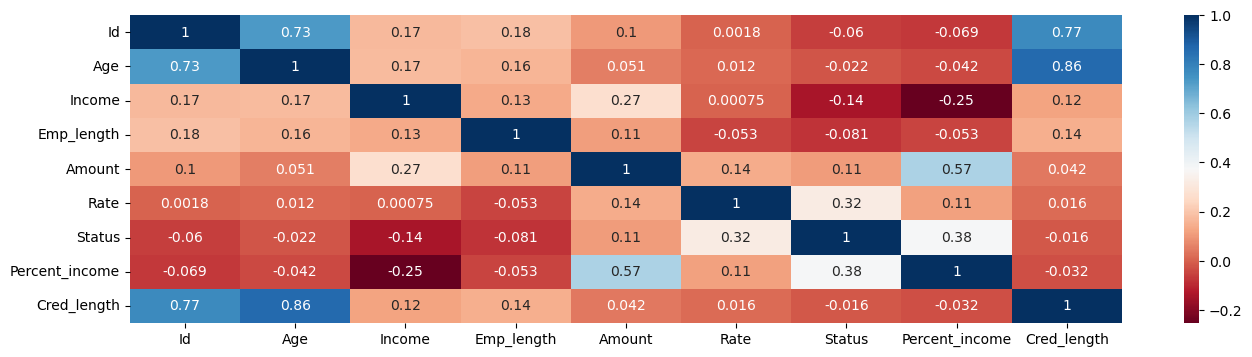

In [19]:
fig = plt.figure(figsize=(16, 4))
sns.heatmap(df.corr(), annot=True, cmap='RdBu')

# Finding and removing outliers:

<Figure size 1600x400 with 0 Axes>

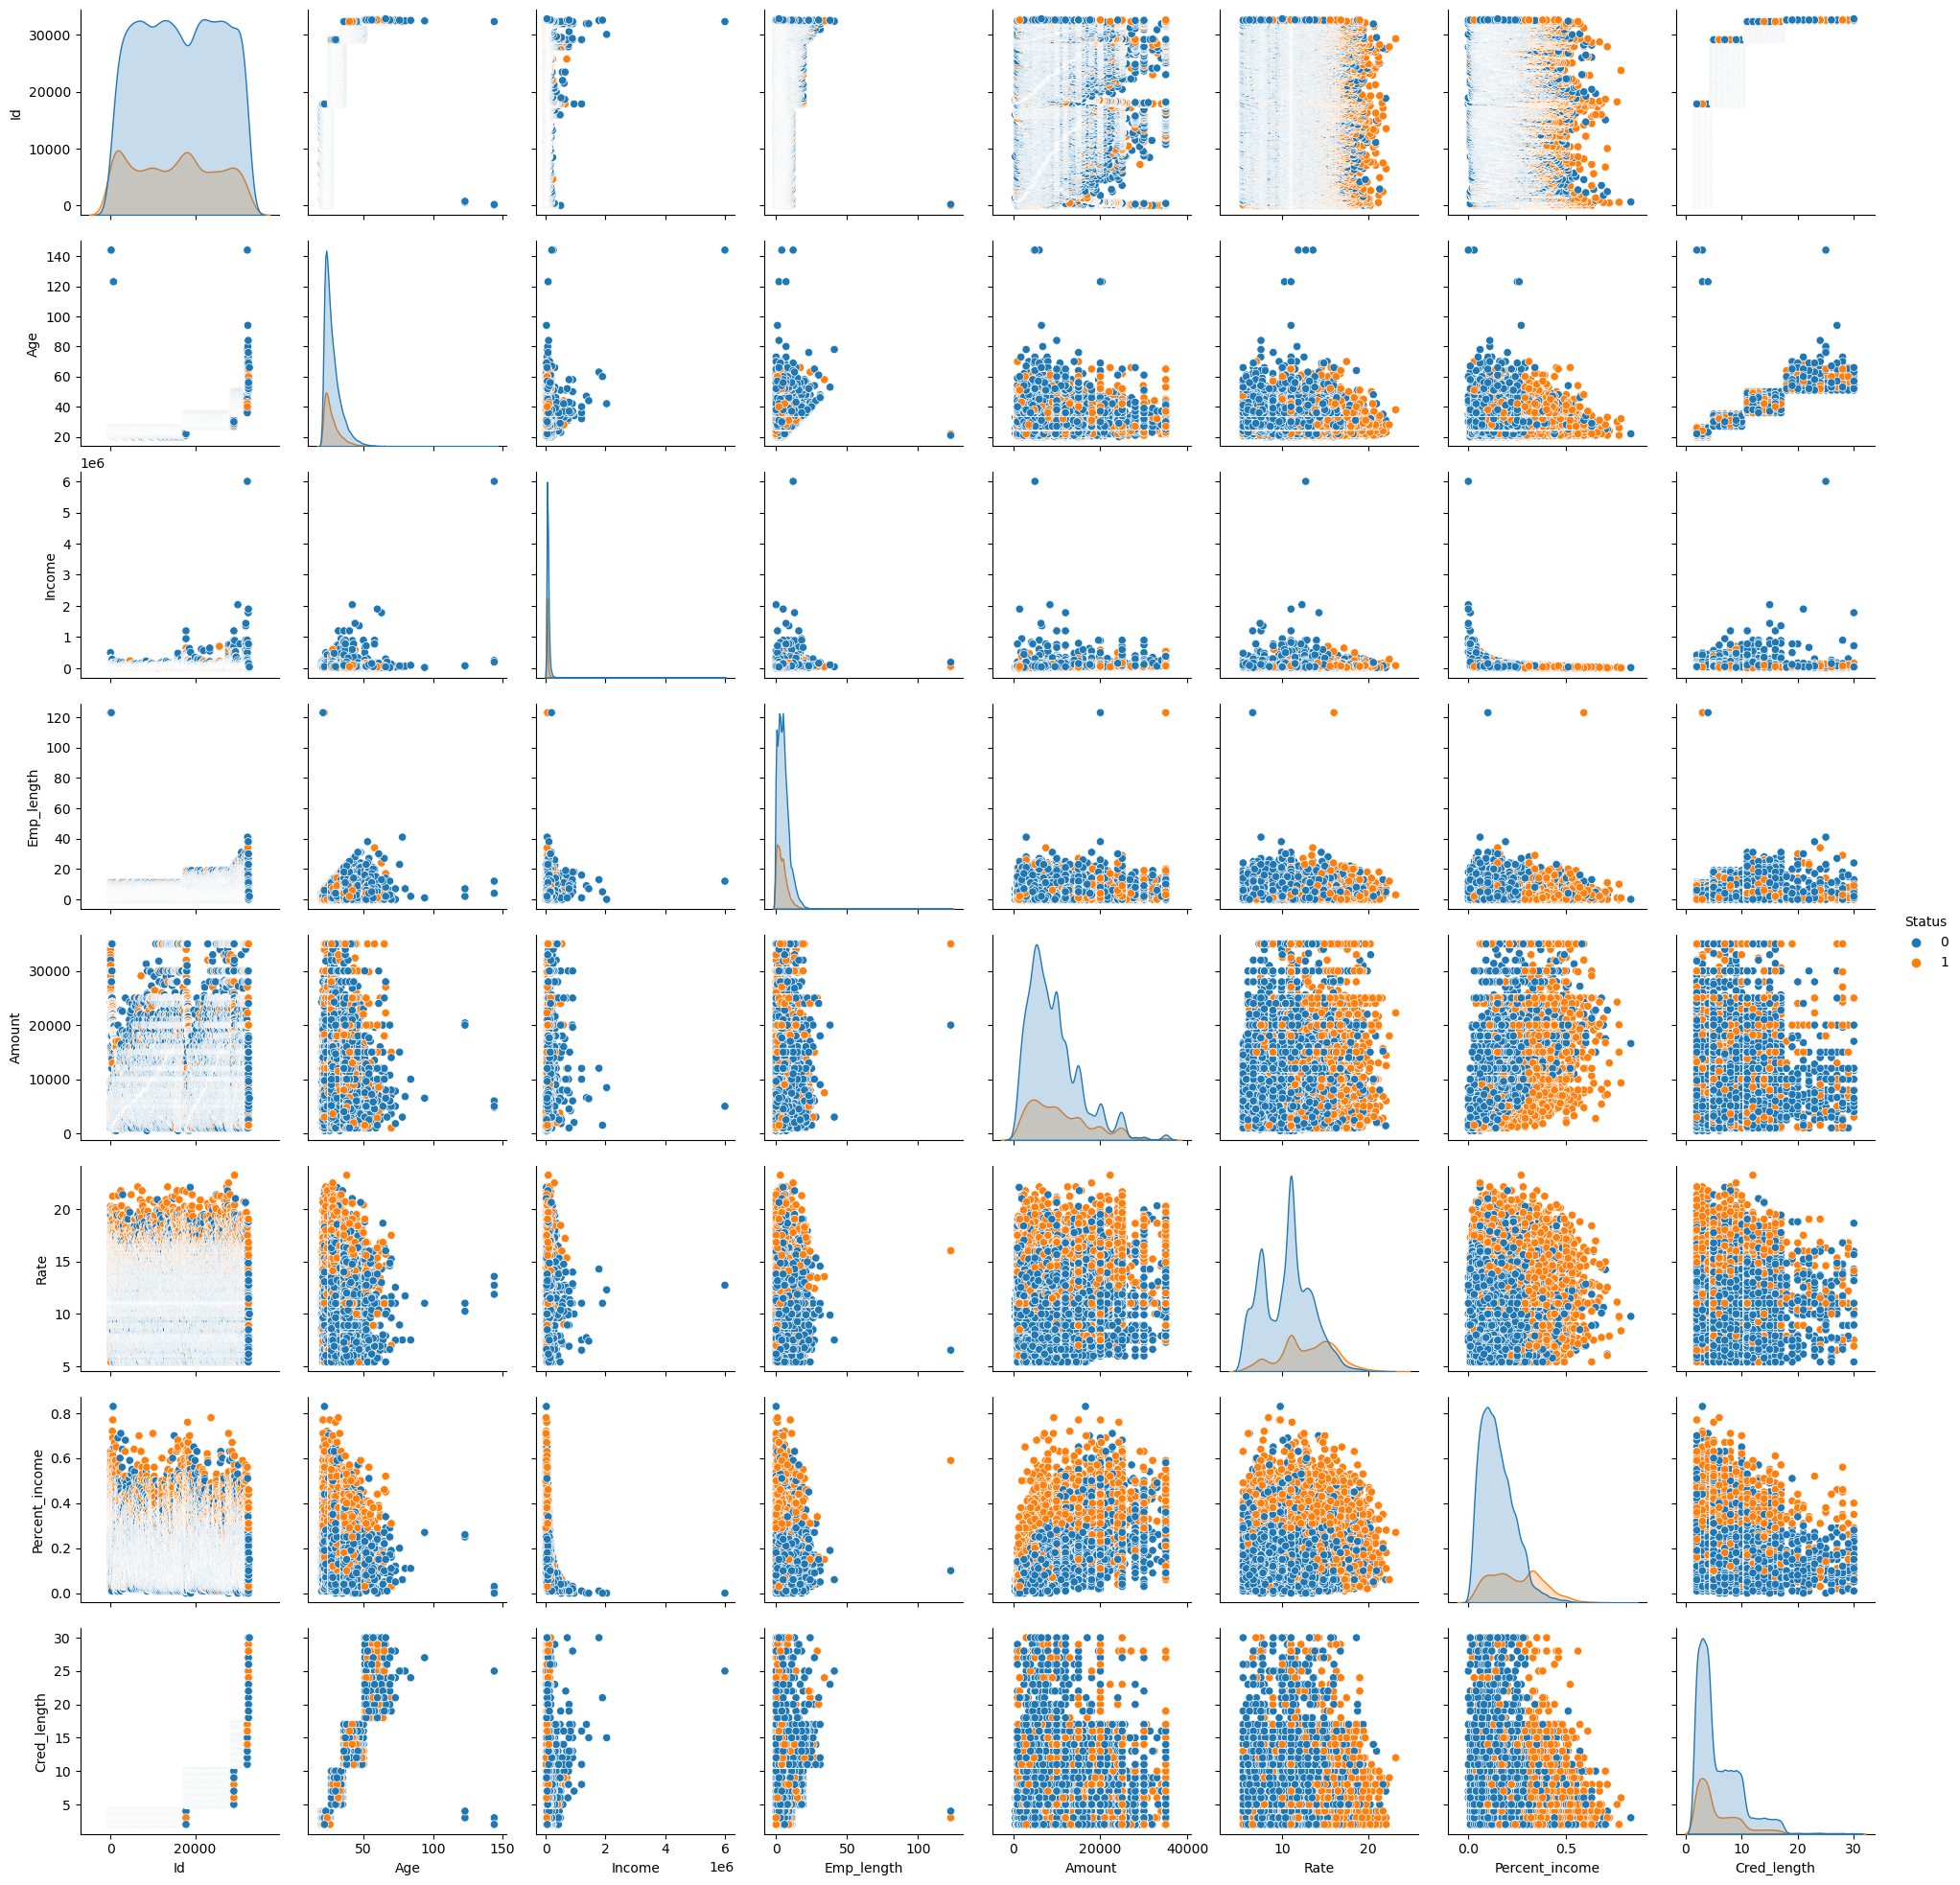

In [20]:
fig = plt.figure(figsize=(16, 4))
sns.pairplot(df, hue='Status', diag_kind='kde')

<Figure size 1600x400 with 0 Axes>

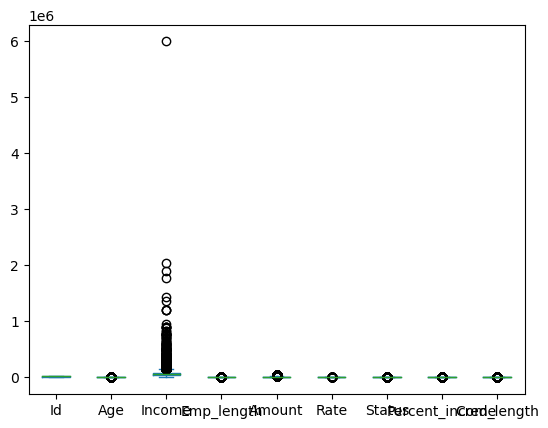

In [21]:
fig = plt.figure(figsize=(16, 4))
df.plot(kind='box')
plt.show()

In [22]:
num_ftrs = ['Age', 'Income', 'Amount', 'Rate', 'Percent_income', 'Cred_length']

for i in num_ftrs:
    print(f'Five box summary for {i}: ')
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    print(f'''

    Q1 score: {Q1},
    ---------------------
    Q3 score: {Q3},
    ---------------------
    IQR score: {IQR},
    ---------------------
    Lower Bound score: {lower_bound},
    ---------------------
    Upper Bound score: {upper_bound}

    ''')

Five box summary for Age: 


    Q1 score: 23.0,
    ---------------------
    Q3 score: 30.0,
    ---------------------
    IQR score: 7.0,
    ---------------------
    Lower Bound score: 12.5,
    ---------------------
    Upper Bound score: 40.5

    
Five box summary for Income: 


    Q1 score: 38500.0,
    ---------------------
    Q3 score: 79200.0,
    ---------------------
    IQR score: 40700.0,
    ---------------------
    Lower Bound score: -22550.0,
    ---------------------
    Upper Bound score: 140250.0

    
Five box summary for Amount: 


    Q1 score: 5000.0,
    ---------------------
    Q3 score: 12200.0,
    ---------------------
    IQR score: 7200.0,
    ---------------------
    Lower Bound score: -5800.0,
    ---------------------
    Upper Bound score: 23000.0

    
Five box summary for Rate: 


    Q1 score: 8.49,
    ---------------------
    Q3 score: 13.11,
    ---------------------
    IQR score: 4.619999999999999,
    ---------------------
    Lower B

# Analyzing Categorical Features:

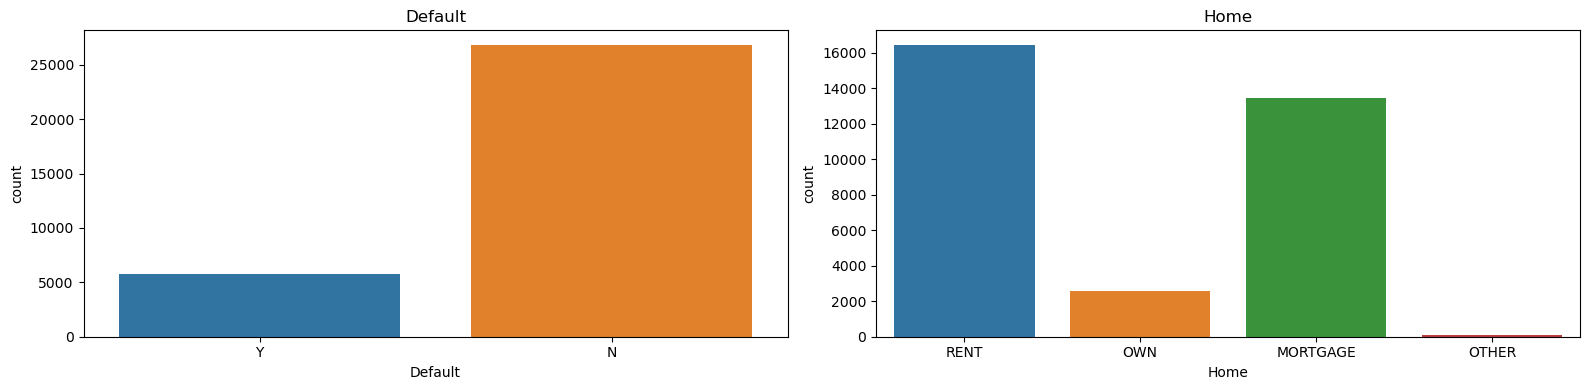

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
sns.countplot(data=df, x='Default', ax=axes[0])
sns.countplot(data=df, x='Home', ax=axes[1])
axes[0].set_title('Default')
axes[1].set_title('Home')
plt.tight_layout()
plt.show()

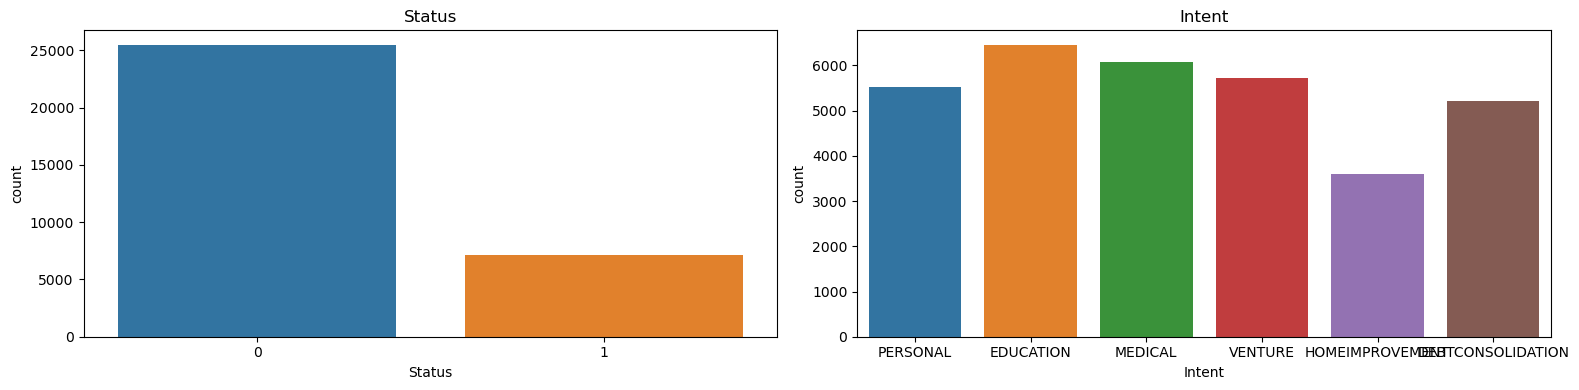

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
sns.countplot(data=df, x='Status', ax=axes[0])
sns.countplot(data=df, x='Intent', ax=axes[1])
axes[0].set_title('Status')
axes[1].set_title('Intent')
plt.tight_layout()
plt.show()

# Analyzing Numeric Features using Each Type :

## Amount: 

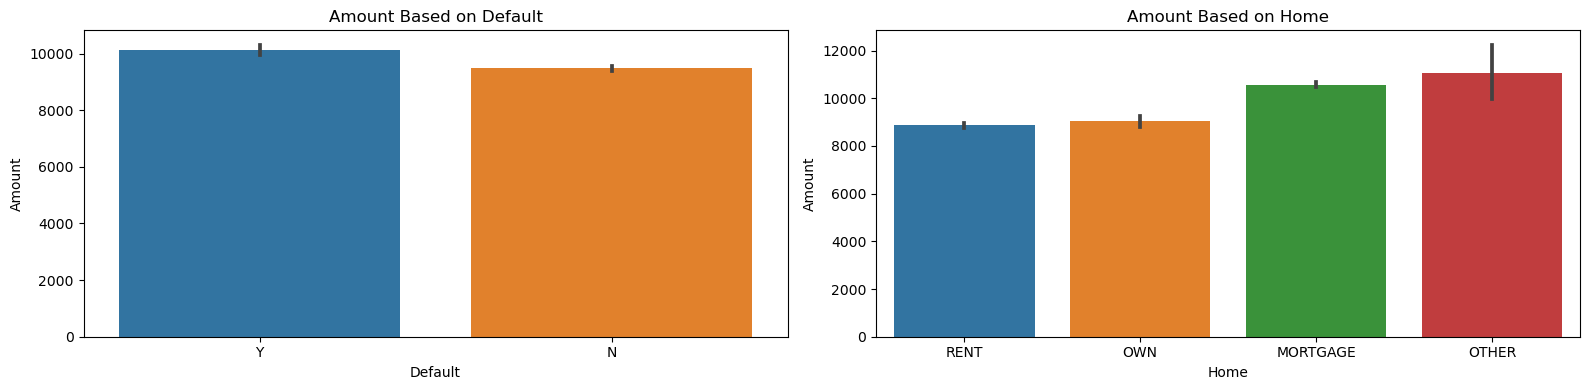

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
sns.barplot(data=df, x='Default', y='Amount', ax=axes[0])
sns.barplot(data=df, x='Home', y='Amount', ax=axes[1])
axes[0].set_title('Amount Based on Default')
axes[1].set_title('Amount Based on Home')
plt.tight_layout()
plt.show()

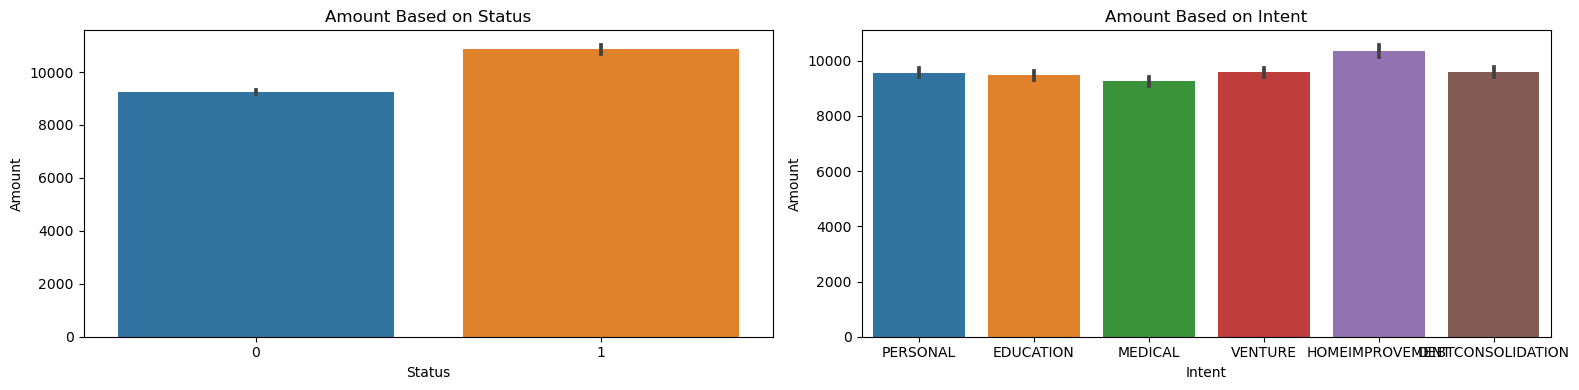

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
sns.barplot(data=df, x='Status', y='Amount', ax=axes[0])
sns.barplot(data=df, x='Intent', y='Amount', ax=axes[1])
axes[0].set_title('Amount Based on Status')
axes[1].set_title('Amount Based on Intent')
plt.tight_layout()
plt.show()

## Income:

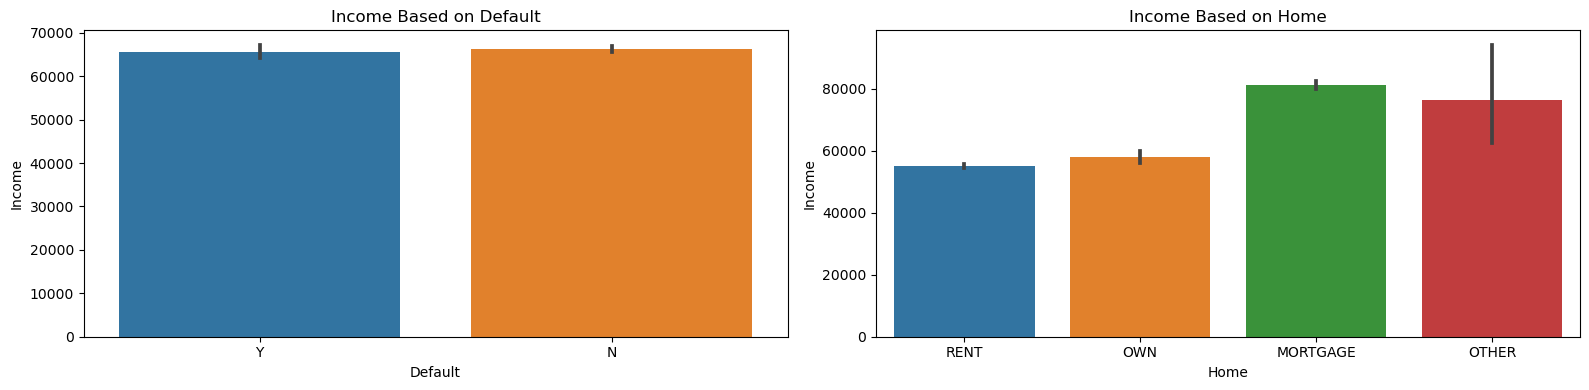

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
sns.barplot(data=df, x='Default', y='Income', ax=axes[0])
sns.barplot(data=df, x='Home', y='Income', ax=axes[1])
axes[0].set_title('Income Based on Default')
axes[1].set_title('Income Based on Home')
plt.tight_layout()
plt.show()

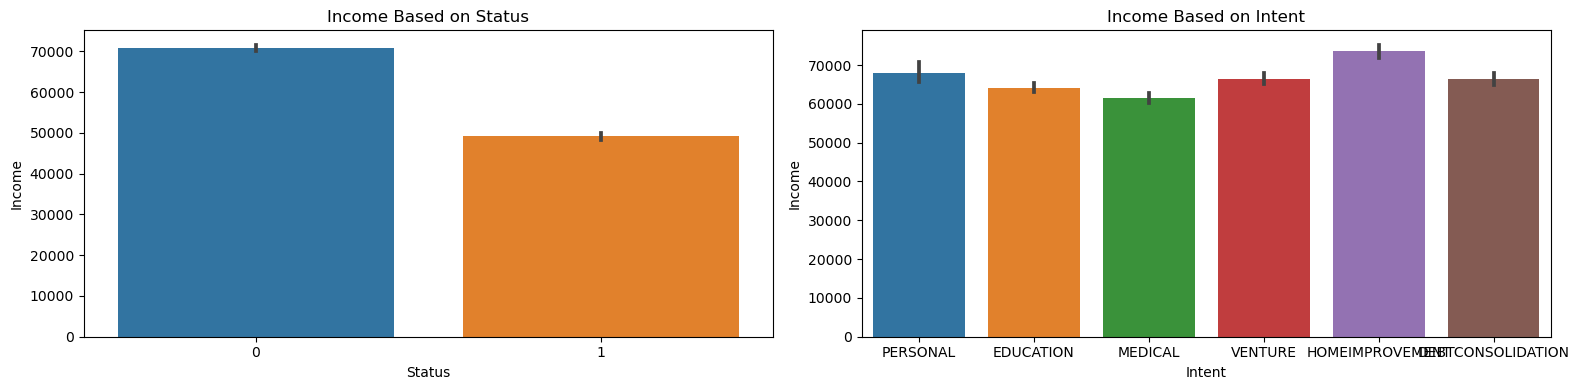

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
sns.barplot(data=df, x='Status', y='Income', ax=axes[0])
sns.barplot(data=df, x='Intent', y='Income', ax=axes[1])
axes[0].set_title('Income Based on Status')
axes[1].set_title('Income Based on Intent')
plt.tight_layout()
plt.show()

## Rate:

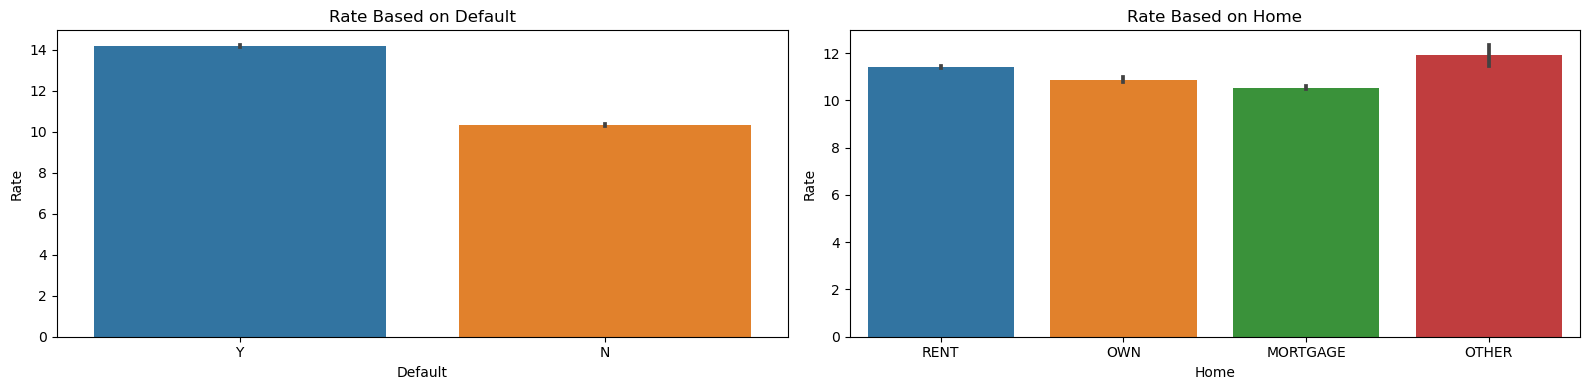

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
sns.barplot(data=df, x='Default', y='Rate', ax=axes[0])
sns.barplot(data=df, x='Home', y='Rate', ax=axes[1])
axes[0].set_title('Rate Based on Default')
axes[1].set_title('Rate Based on Home')
plt.tight_layout()
plt.show()

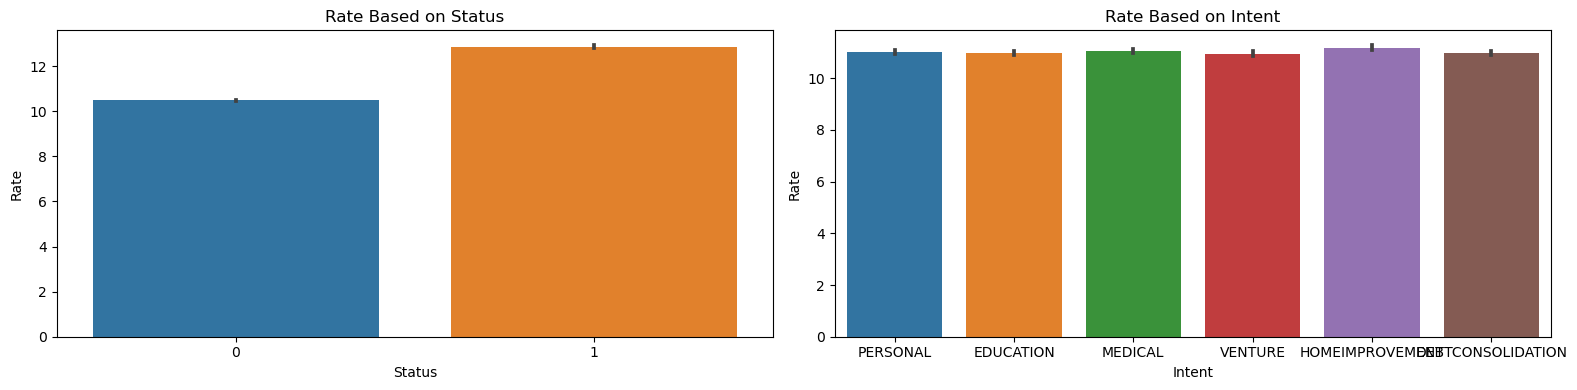

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
sns.barplot(data=df, x='Status', y='Rate', ax=axes[0])
sns.barplot(data=df, x='Intent', y='Rate', ax=axes[1])
axes[0].set_title('Rate Based on Status')
axes[1].set_title('Rate Based on Intent')
plt.tight_layout()
plt.show()

# Machine Learning:

### One Hot Encoding:

In [31]:
from sklearn.preprocessing import LabelEncoder

ohe = LabelEncoder()

In [32]:
df_cat = df.select_dtypes(include=['object']).columns.tolist()

In [33]:
df[df_cat]

,Home,Intent,Default
0,RENT,PERSONAL,Y
1,OWN,EDUCATION,N
2,MORTGAGE,MEDICAL,N
3,RENT,MEDICAL,N
4,RENT,MEDICAL,Y
...,...,...,...
32576,MORTGAGE,PERSONAL,N
32577,MORTGAGE,PERSONAL,N
32578,RENT,HOMEIMPROVEMENT,N
32579,MORTGAGE,PERSONAL,N


In [34]:
df.Home = ohe.fit_transform(df.Home)

df.Intent = ohe.fit_transform(df.Intent)

df.Default = ohe.fit_transform(df.Default)

df.Status = ohe.fit_transform(df.Status)

In [35]:
df

,Id,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
0,0,22,59000,3,123.0,4,35000,16.02,1,0.59,1,3
1,1,21,9600,2,5.0,1,1000,11.14,0,0.10,0,2
2,2,25,9600,0,1.0,3,5500,12.87,1,0.57,0,3
3,3,23,65500,3,4.0,3,35000,15.23,1,0.53,0,2
4,4,24,54400,3,8.0,3,35000,14.27,1,0.55,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,32576,57,53000,0,1.0,4,5800,13.16,0,0.11,0,30
32577,32577,54,120000,0,4.0,4,17625,7.49,0,0.15,0,19
32578,32578,65,76000,3,3.0,2,35000,10.99,1,0.46,0,28
32579,32579,56,150000,0,5.0,4,15000,11.48,0,0.10,0,26


## Splitting data for training & testing:

In [36]:
X = df.drop(['Status'], axis=1)
y = df.Status

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
x_train, x_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state = 2)

In [39]:
x_train.head(5)

,Id,Age,Income,Home,Emp_length,Intent,Amount,Rate,Percent_income,Default,Cred_length
27604,27604,28,150000,0,12.0,2,15000,11.89,0.10,0,9
4075,4075,23,80000,3,3.0,1,4000,14.46,0.05,1,4
9592,9592,21,50000,3,5.0,0,8300,8.90,0.17,0,4
6376,6376,26,49200,2,11.0,2,10750,11.11,0.22,0,3
1190,1190,23,54996,3,4.0,1,16700,10.37,0.30,0,3


# Loading Various Classification Models:

Since, it's a classification-based Supervised Learning.

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier

In [41]:
dtree = DecisionTreeClassifier()
rftree = RandomForestClassifier()
lr = LogisticRegression()
nb = MultinomialNB()
gb = GradientBoostingClassifier()

## Training the Models:

In [42]:
dtree.fit(x_train, y_train)

DecisionTreeClassifier()

In [43]:
rftree.fit(x_train, y_train)

RandomForestClassifier()

In [44]:
lr.fit(x_train, y_train)

LogisticRegression()

In [45]:
nb.fit(x_train, y_train)

MultinomialNB()

In [46]:
gb.fit(x_train, y_train)

GradientBoostingClassifier()

## Making Predictions and Evaluating the Models:

In [47]:
y_pred_dTree = dtree.predict(x_test)
y_pred_rftree = rftree.predict(x_test)
y_pred_lr = lr.predict(x_test)
y_pred_nb = nb.predict(x_test)
y_pred_gb = gb.predict(x_test)

## Accuracy score:

In [48]:
from sklearn.metrics import accuracy_score

In [49]:
print(f'Accuracy score for Decicion Tree: {accuracy_score(y_test, y_pred_dTree)}')
print(f'Accuracy score for Random Forest Tree: {accuracy_score(y_test, y_pred_rftree)}')
print(f'Accuracy score for Logistic Regression Tree: {accuracy_score(y_test, y_pred_lr)}')
print(f'Accuracy score for Naive Bayes: {accuracy_score(y_test, y_pred_nb)}')
print(f'Accuracy score for Gradient Boosting: {accuracy_score(y_test, y_pred_gb)}')

Accuracy score for Decicion Tree: 0.8790854687739758
Accuracy score for Random Forest Tree: 0.9100813257633881
Accuracy score for Logistic Regression Tree: 0.8164799754488261
Accuracy score for Naive Bayes: 0.6292772748197023
Accuracy score for Gradient Boosting: 0.9062452048488568


In [50]:
accuracy_scores = [
    {'Model': 'Decision Tree', 'Accuracy Score': accuracy_score(y_test, y_pred_dTree)},
    {'Model': 'Random Forest', 'Accuracy Score': accuracy_score(y_test, y_pred_rftree)},
    {'Model': 'Logistic Regression', 'Accuracy Score': accuracy_score(y_test, y_pred_lr)},
    {'Model': 'Naive Bayes', 'Accuracy Score': accuracy_score(y_test, y_pred_nb)},
    {'Model': 'Gradient Boosting', 'Accuracy Score': accuracy_score(y_test, y_pred_gb)}
]

accuracy_df = pd.DataFrame(accuracy_scores).sort_values(by='Accuracy Score', ascending=False)
accuracy_df.head()

,Model,Accuracy Score
1,Random Forest,0.910081
4,Gradient Boosting,0.906245
0,Decision Tree,0.879085
2,Logistic Regression,0.816480
3,Naive Bayes,0.629277


<AxesSubplot:xlabel='Accuracy Score', ylabel='Model'>

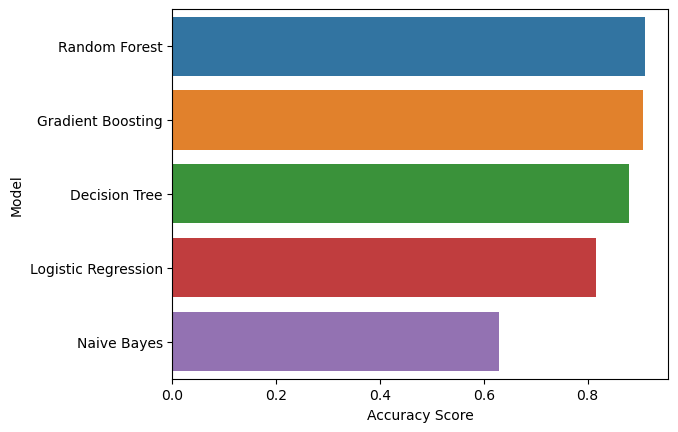

In [51]:
sns.barplot(data=accuracy_df, x='Accuracy Score', y='Model')

### Due to the highest accuracy score, we will prefer random forest model for our future predictions.

In [52]:
#!pip install ipywidget if not installed in your environment.
import ipywidgets as widgets
from IPython.display import display

model_dropdown = widgets.Dropdown(
    options=accuracy_df['Model'],
    description='Select Model: ',
    disabled=False,
)

model_dropdown

Dropdown(description='Select Model: ', options=('Random Forest', 'Gradient Boosting', 'Decision Tree', 'Logist…

In [53]:
def get_model(model_name):
    if model_name == 'Decision Tree':
        return dtree
    elif model_name == 'Random Forest':
        return rftree
    elif model_name == 'Logistic Regression':
        return lr
    elif model_name == 'Naive Bayes':
        return nb
    else:
        return gb

In [54]:
print('Data: ')
print(x_test.iloc[454].values)

Data: 
[1.9601e+04 3.2000e+01 3.5000e+04 0.0000e+00 2.0000e+00 4.0000e+00
 6.0750e+03 1.3490e+01 1.7000e-01 0.0000e+00 9.0000e+00]


In [55]:
print('Actual Value: ')
print(y_test.iloc[454])

Actual Value: 
0


In [56]:
print(f'Predicting Value using {model_dropdown.value}: ')
get_model(model_dropdown.value).predict([x_test.iloc[454].values])

Predicting Value using Random Forest: 


C:\Users\abdul\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [57]:
# Done